# MBTI Modelling Notebook

In [ ]:
pip install catboost

In [ ]:
	Models	Test accuracy
0	CatBoost Classifier	0.69276
1	Linear Support Vector classifier	0.68671
2	XGBoost Classifier	0.68296
3 Neural Network Classifier 0.64979
4	Support Vector classifier	0.64102
5	logistic regression	0.61342
6	Random Forest Classifier	0.49878


In [ ]:
import pandas as pd
import numpy as np

data=pd.read_csv('/content/Data-LinksAdded.csv')
newData = pd.read_csv('/content/newData-LinksAdded.csv')
data = pd.concat([data, newData]).reset_index(drop=True)

In [ ]:
data.shape

(8710, 3)

In [ ]:
  data['type'].value_counts()

INFP    1834
INFJ    1472
INTP    1305
INTJ    1093
ENTP     688
ENFP     677
ISTP     340
ISFP     273
ENTJ     233
ISTJ     207
ENFJ     195
ISFJ     168
ESTP      90
ESFP      51
ESFJ      45
ESTJ      39
Name: type, dtype: int64

In [ ]:
data.posts[0]

'         enfp and intj moments     sportscenter not top ten plays     pranks   what has been the most life changing experience in your life           on repeat for most of today    may the perc experience immerse you    the last thing my infj friend posted on his facebook before committing suicide the next day  rest in peace        hello enfj7  sorry to hear of your distress  it s only natural for a relationship to not be perfection all the time in every moment of existence  try to figure the hard times as times of growth  as      84389  84390             welcome and stuff       game  set  match    prozac  wellbrutin  at least thirty minutes of moving your legs  and i don t mean moving them while sitting in your same desk chair   weed in moderation  maybe try edibles as a healthier alternative      basically come up with three items you ve determined that each type  or whichever types you want to do  would more than likely use  given each types  cognitive functions and whatnot  when l

In [ ]:
from nltk.stem import WordNetLemmatizer

class Lemmatizer(object):
    def __init__(self):
        self.lemmatizer = WordNetLemmatizer()
    def __call__(self, sentence):
        return [self.lemmatizer.lemmatize(word) for word in sentence.split() if len(word)>2]

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer=TfidfVectorizer( max_features=5000,stop_words='english',tokenizer=Lemmatizer())
vectorizer.fit(data.posts)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"
/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'wa'] not in stop_words.
  % sorted(inconsistent)


TfidfVectorizer(max_features=5000, stop_words='english',
                tokenizer=<__main__.Lemmatizer object at 0x7f9d20bff9d0>)

In [ ]:
# import pickle

# with open('vectorizer.pk', 'wb') as f:
#   pickle.dump(vectorizer, f)

In [ ]:
data_posts=vectorizer.transform(data.posts).toarray()

In [ ]:
data_posts

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.05742331, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.03538296, 0.02159549, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.05149128, 0.01571349, 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
from sklearn.preprocessing import LabelEncoder

target_encoder=LabelEncoder()
data_target=target_encoder.fit_transform(data.type)

In [ ]:
from keras.utils import np_utils

dummy_y = np_utils.to_categorical(data_target)

In [ ]:
dummy_y[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

### From above it is quite evident that there are many links in the text data. That needed to be removed.

In [ ]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(data_posts, data_target ,test_size=0.2,random_state=42,stratify=data_target)

In [ ]:
train_X.shape, train_y.shape

((6968, 5000), (6968,))

In [ ]:
test_y

array([11,  9, 11, ..., 15,  8, 15])

In [ ]:
# check version number
import imblearn
print(imblearn.__version__)

0.8.1


In [ ]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
train_X, train_y = oversample.fit_resample(train_X, train_y)

In [ ]:
train_X.shape, train_y.shape

((23472, 5000), (23472,))

In [ ]:
# Generate and plot a synthetic imbalanced classification dataset
from collections import Counter

counter = Counter(train_y)
print(counter)

Counter({8: 1467, 9: 1467, 10: 1467, 1: 1467, 12: 1467, 11: 1467, 3: 1467, 2: 1467, 15: 1467, 13: 1467, 7: 1467, 14: 1467, 0: 1467, 6: 1467, 5: 1467, 4: 1467})


# Model Building

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

model_log=LogisticRegression(max_iter=4000,C=0.5,n_jobs=-1)
model_log.fit(train_X,train_y)

LogisticRegression(C=0.5, max_iter=4000, n_jobs=-1)

In [ ]:
# with open('Final-model_LG-Reg.pkl','wb') as f:
#     pickle.dump(model_log,f)

In [ ]:
# classification_report(train_y,model_log.predict(train_X),target_names=target_encoder.inverse_transform([i for i in range(16)]))

In [ ]:
# classification_report(test_y,model_log.predict(test_X),target_names=target_encoder.inverse_transform([i for i in range(16)]))

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

print(accuracy_score(test_y,model_log.predict(test_X)))
print(f1_score(test_y, model_log.predict(test_X), average = 'weighted'))

0.6808266360505166
0.6818633875250582


### Linear Support Vector classifier

In [ ]:
from sklearn.svm import LinearSVC

model_linear_svc=LinearSVC()
model_linear_svc.fit(train_X,train_y)

LinearSVC()

In [ ]:
# with open('Final-model_linear_svc.pkl','wb') as f:
#     pickle.dump(model_linear_svc,f)

In [ ]:
print(accuracy_score(test_y,model_linear_svc.predict(test_X)))
print(f1_score(test_y, model_linear_svc.predict(test_X), average = 'weighted'))

0.6130884041331802
0.6108592733227876


### Support Vector classifier

In [ ]:
model_svc=SVC()
model_svc.fit(train_X,train_y)

SVC()

In [ ]:
# with open('model_svc.pkl','wb') as f:
#     pickle.dump(model_svc,f)

In [ ]:
print(accuracy_score(test_y,model_svc.predict(test_X)))
print(f1_score(test_y, model_svc.predict(test_X), average = 'weighted'))

### Neural Net

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
import tensorflow as tf

print('GPU name: ', tf.config.experimental.list_physical_devices('GPU'))

GPU name:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.AUC(name='auc'),
      'accuracy',
]

In [ ]:
#Initializing Neural Network
classifier = Sequential()

In [ ]:
train_X.shape[1]

5000

In [ ]:
classifier.add(Dense(256, kernel_initializer = 'uniform', activation = 'relu', input_dim = train_X.shape[1]))
classifier.add(Dense(128, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(64, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(32, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(16, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(8, kernel_initializer = 'uniform', activation = 'softmax'))

In [ ]:
classifier.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics = METRICS)

In [ ]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               1280256   
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 8)                 136       
                                                                 
Total params: 1,324,152
Trainable params: 1,324,152
Non-

In [ ]:
history = classifier.fit(train_X, train_y, batch_size = 100, epochs = 100, validation_data=(test_X, test_y))

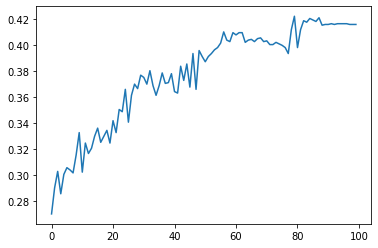

In [ ]:
plt.plot(history.history['val_accuracy'])

Multinomial Naive Bayes

In [ ]:
model_multinomial_nb=MultinomialNB()
model_multinomial_nb.fit(train_X,train_y)

MultinomialNB()

In [ ]:
# with open('model_multinomial_nb+.pkl','wb') as f:
#     pickle.dump(model_multinomial_nb,f)

Decision Tree Classifier

In [ ]:
model_tree=DecisionTreeClassifier(max_depth=14)
model_tree.fit(train_X,train_y)

DecisionTreeClassifier(max_depth=14)

In [ ]:
# with open('model_tree+.pkl','wb') as f:
#     pickle.dump(model_tree,f)

<h4 style="background-color:#cc99ff;font-family:newtimeroman;font-size:300%;text-align:center;border-radius: 15px 50px;padding: 5px ">Random Forest Classifier</h4>

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_forest=RandomForestClassifier(max_depth=400)
model_forest.fit(train_X,train_y)

RandomForestClassifier(max_depth=400)

In [ ]:
# with open('/content/models/model_forest.pkl','wb') as f:
#     pickle.dump(model_forest,f)

In [ ]:
print(accuracy_score(test_y,model_forest.predict(test_X)))
print(f1_score(test_y, model_forest.predict(test_X), average = 'weighted'))

### XGBoost Classifier

In [52]:
import xgboost
xgboost.__version__

'0.90'

In [53]:
pip install xgboost==1.5.1

     |████████████████████████████████| 173.5 MB 13 kB/s 
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [ ]:
from xgboost import XGBClassifier

model_xgb=XGBClassifier(gpu_id=0,tree_method='gpu_hist',max_depth=500,n_estimators=750,learning_rate=0.1, subsample = 0.7, colsample_bylevel = 0.5)
model_xgb.fit(train_X,train_y)

In [ ]:
print(accuracy_score(test_y,model_xgb.predict(test_X)))
print(f1_score(test_y, model_xgb.predict(test_X), average = 'weighted'))

In [ ]:
# model_xgb.save_model('model_xgb-Links++.json')

In [ ]:
import xgboost as xgb
xgb.__version__

'0.90'

In [ ]:
# with open('/content/drive/MyDrive/Colab Notebooks/MBTI Models/model_xgb-Links++.pkl','wb') as f:
#     pickle.dump(model_xgb,f)

### CatBoost Classifier

In [ ]:
model_cat=CatBoostClassifier(loss_function='MultiClass',eval_metric='MultiClass',task_type='GPU',depth = 10)
model_cat.fit(train_X,train_y)

In [ ]:
print(accuracy_score(test_y,model_cat.predict(test_X)))
print(f1_score(test_y, model_cat.predict(test_X), average = 'weighted'))

In [ ]:
# with open('Final-model_cat.pkl','wb') as f:
#     pickle.dump(model_cat,f)